## Numerical Computing with NumPy

Although the Python interpreter itself already brings a rich variety of data structures with it, NumPy and other libraries add to these in a valuable fashion. 

We will focuses on NumPy, which provides a multidimensional array object to store homogeneous or heterogeneous data arrays and supports vectorization of code.

We will cover the following data structures


*   ndarray (regular) - n-dimensional array object - Used for large arrays of numerical data
* ndarray (record) - 2-dimensional array object - Used for tabular data organized in columns




### Arrays with Python Lists
A simple list can already be considered a one-dimensional array:


In [1]:
v = [0.5, 0.75, 1.0, 1.5, 2.0]

Since list objects can contain arbitrary other objects, they can also contain other list objects. In that way, two- and higher-dimensional arrays are easily constructed by nested list objects:

In [2]:
m = [v, v, v]
m

[[0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0]]

One can also easily select rows via simple indexing or single elements via double indexing (whole columns, however, are not so easy to select)

In [3]:
m[1]

[0.5, 0.75, 1.0, 1.5, 2.0]

In [4]:
m[1][0]

0.5

### The Python array Class
According to the python documentation: This module defines an object type which can compactly represent an array of basic
values: characters, integers, floating point numbers. Arrays are sequence types and
behave very much like lists, except that the type of objects stored in them is con‐
strained. The type is specified at object creation time by using a type code, which is a
single character.

In [5]:
v = [0.5, 0.75, 1.0, 1.5, 2.0]

In [6]:
import array

a = array.array('f', v)
a

array('f', [0.5, 0.75, 1.0, 1.5, 2.0])

In [8]:
a.append(0.5)
a

array('f', [0.5, 0.75, 1.0, 1.5, 2.0, 0.5, 0.5])

In [9]:
a.extend([5.0, 6.75])
a

array('f', [0.5, 0.75, 1.0, 1.5, 2.0, 0.5, 0.5, 5.0, 6.75])

In [10]:
2 * a

array('f', [0.5, 0.75, 1.0, 1.5, 2.0, 0.5, 0.5, 5.0, 6.75, 0.5, 0.75, 1.0, 1.5, 2.0, 0.5, 0.5, 5.0, 6.75])

Trying to append an object of a different data type than the one specified raises a
TypeError:

In [11]:
a.append('string')

TypeError: ignored

However, the array object can easily be converted back to a list object if such flexibility is required.

### Regular NumPy Arrays

Composing array structures with list objects works, somewhat. But it is not really
convenient, and the list class has not been built with this specific goal in mind. It
has rather a much broader and more general scope. The array class is a bit more spe‐
cialized, providing some useful features for working with arrays of data. However, a
truly specialized class could be really beneficial to handle array-type structures.

#### The Basics
numpy.ndarray is just such a class, built with the specific goal of handling ndimensional arrays both conveniently and efficiently—i.e., in a highly performant manner. The basic handling of instances of this class is again best illustrated by
examples:

In [2]:
import numpy as np

In [13]:
a = np.array([0, 0.5, 1.0, 1.5, 2.0])
a

array([0. , 0.5, 1. , 1.5, 2. ])

In [14]:
type(a)

numpy.ndarray

In [15]:
a = np.array(['a', 'b', 'c']) # Creates an ndarray object out of a list object with strs.
a

array(['a', 'b', 'c'], dtype='<U1')

In [17]:
a = np.arange(2, 20, 2) # np.arange() works similar to range()
a

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [18]:
a[5:] # With one-dimensional ndarray objects, indexing works as usual.

array([12, 14, 16, 18])

In [21]:
a[:2]

array([2, 4])

In [22]:
# A major feature of the ndarray class is the multitude of built-in methods. For instance:
a.sum()

90

In [23]:
a.std() # The standard deviation of the elements

5.163977794943222

In [24]:
a.cumsum() # The cumulative sum of all elements (starting at index position 0).

array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])

Another major feature is the (vectorized) mathematical operations defined on ndarray objects:

In [25]:
l = [0., 0.5, 1.5, 3., 5.] # Scalar multiplication with list objects leads to a repetition of elements
2 * l

[0.0, 0.5, 1.5, 3.0, 5.0, 0.0, 0.5, 1.5, 3.0, 5.0]

In [26]:
a # By contrast, working with ndarray objects implements a proper scalar multiplication

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [27]:
2 * a 

array([ 4,  8, 12, 16, 20, 24, 28, 32, 36])

In [28]:
a ** 2 # This calculates element-wise the square values.

array([  4,  16,  36,  64, 100, 144, 196, 256, 324])

Universal functions are another important feature of the NumPy package. They are “universal” in the sense that they in general operate on ndarray objects as well as on basic Python data types. However, when applying universal functions to, say, a Python float object, you need to be aware of the reduced performance compared to the same functionality found in the math module

In [29]:
np.exp(a) # Calculates the exponential values element-wise

array([7.38905610e+00, 5.45981500e+01, 4.03428793e+02, 2.98095799e+03,
       2.20264658e+04, 1.62754791e+05, 1.20260428e+06, 8.88611052e+06,
       6.56599691e+07])

In [30]:
np.sqrt(a) # Calculates the square root for every element

array([1.41421356, 2.        , 2.44948974, 2.82842712, 3.16227766,
       3.46410162, 3.74165739, 4.        , 4.24264069])

In [31]:
np.sqrt(2.5) # Calculates the square root for a Python float object

1.5811388300841898

In [32]:
import math
math.sqrt(2.5) # The same calculation, this time with the math module

1.5811388300841898

In [33]:
math.sqrt(a) # The math lib cannot be applied to the ndarray object directly

TypeError: ignored

In [34]:
%timeit np.sqrt(2.5) # Applying the universal function np.sqrt() to a Python float object is much slower
                     # than the same operation with math.sqrt()

The slowest run took 42.63 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 835 ns per loop


In [35]:
%timeit math.sqrt(2.5)

The slowest run took 31.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 108 ns per loop


### Multiple Dimensions

The transition to more than one dimension is seamless, and all features presented so far carry over to the more general cases. In particular, the indexing system is made consistent across all dimensions:


In [38]:
b = np.array([a, a * 2]) # Constructs a two dimensional ndarray object out of the one-dimensional one
b

array([[ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36]])

In [39]:
b[0] # Selects the first row

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [40]:
b[0, 2] # Selects the third element in the first row; indices are separated, within the brackets by a comma

6

In [41]:
b[:, 1] # Selects the second column

array([4, 8])

In [42]:
b.sum() # Calculates the sum of all values

270

In [43]:
b.sum(axis=0) # Calculates the sum alone the first axis (column wise)

array([ 6, 12, 18, 24, 30, 36, 42, 48, 54])

In [44]:
b.sum(axis=1) # Calculates the sum along the second axis (row wise)

array([ 90, 180])

There are a number of ways to initialize (instantiate) ndarray objects. One is as presented before, via np.array. 

However, this assumes that all elements of the array are already available. In contrast, one might like to have the ndarray objects instantiated first to populate them later with results generated during the execution of code. To this end, one can use the following functions:

In [45]:
c = np.zeros((2, 3), dtype='i', order='C') # Creates an ndarray object prepopulated with zeros
c

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [48]:
c = np.ones((2, 3, 4), dtype='i', order='C') # Creates an ndarray object prepopulated with ones
c

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int32)

In [49]:
d = np.zeros_like(c, dtype='f16', order='C') # The same, but takes another ndarray object to infer the shape
d

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float128)

In [50]:
e = np.empty((2, 3, 2)) # Creates an ndarray object not prepoulated with anything (Numbers are bits present in memory)
e

array([[[4.68534485e-310, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [6.91643308e-310, 1.58817677e-052]],

       [[7.73422389e-091, 5.49167910e+174],
        [9.99506045e-048, 3.85340822e-057],
        [3.99910963e+252, 6.91662203e-310]]])

In [51]:
f = np.empty_like(c) 
f

array([[[-442415520,      22079,         50,          0],
        [         0,          0,          0,          0],
        [         0,      32594, 1852990827,  892234853]],

       [[ 845230690,  758723892, 1647653174, 1681273901],
        [ 842542388,  908932913,  845297252,  876097584],
        [ 775434292, 1952543859, -470518923,      32594]]], dtype=int32)

In [3]:
np.eye(5) # Creates a square matrix as an ndarray object with the diagonal populated by ones

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [5]:
g = np.linspace(5, 15, 12) # Creates a 1-dimensional ndarray object with evenly spaced intervals (inputs are start, end, and number of elements)
g

array([ 5.        ,  5.90909091,  6.81818182,  7.72727273,  8.63636364,
        9.54545455, 10.45454545, 11.36363636, 12.27272727, 13.18181818,
       14.09090909, 15.        ])

For all these functions, you can provide the following parameters:


*   ```shape``` - Either an int, a sequence of int objects, or a reference to another ndarray
*   ```dtype``` -A dtype—these are NumPy-specific data types for ndarray objects
*   ```order``` The order in which to store elements in memory: C for C-like (i.e., row-wise) or F for Fortran-like (i.e., column-wise)


Here, it becomes obvious how ```NumPy``` specializes the construction of arrays with the
ndarray class, in comparison to the list -based approach:

* The ndarray object has built-in dimensions (axes).
* The ndarray object is immutable; its length (size) is fixed.
* It only allows for a single data type (np.dtype) for the whole array.

The array class by contrast shares only the characteristic of allowing for a single data type (type code, dtype).

<figure>
<center>
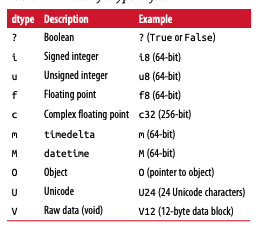
<figcaption>Image Caption</figcaption></center>
</figure>

### Metainformation

Every ndarray object provides access to a number of useful attributes


In [6]:
g.size # The number of elements

12

In [7]:
g.itemsize # The number of bytes used to represent one element

8

In [8]:
g.ndim # The number of dimensions

1

In [9]:
g.shape # The shape of the ndarray object

(12,)

In [10]:
g.dtype # The dtype of the elements

dtype('float64')

In [11]:
g.nbytes # The total number of bytes used in memory

96

### Reshaping and Resizing

Although ndarray objects are immutable by default, there are multiple options to
reshape and resize such an object. While reshaping in general just provides another
view on the same data, resizing in general creates a new (temporary) object. First,
some examples of reshaping:

In [13]:
g = np.arange(15)  # Create a range of 15 elements
g

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
g.shape # The shape of the original ndarray object

(15,)

In [15]:
np.shape(g) 

(15,)

In [16]:
g.reshape((3, 5)) # Reshaping to two dimensions (memory view)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [18]:
h = g.reshape((5,3)) # Creaating a new object
h

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [19]:
h.T # The transpose of the new ndarray object

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [20]:
h.transpose()

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

During a reshaping operation, the total number of elements in the ndarray object is unchanged. During a resizing operation, this number changes - it either decreases or increases.

In [21]:
g

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [22]:
np.resize(g,(3,1)) # Two dimensions, downsizing

array([[0],
       [1],
       [2]])

In [23]:
np.resize(g, (2,5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [24]:
n = np.resize(g, (5,4)) # Two dimensions, upsizing
n

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14,  0],
       [ 1,  2,  3,  4]])

**Stacking** is a special operation that allows the horizontal or vertical combination of two ndarray objects. However, the size of the "connecting" dimension must be the same

In [25]:
h

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [26]:
np.hstack((h, 2*h)) # Horizontal stacking of two ndarray objects

array([[ 0,  1,  2,  0,  2,  4],
       [ 3,  4,  5,  6,  8, 10],
       [ 6,  7,  8, 12, 14, 16],
       [ 9, 10, 11, 18, 20, 22],
       [12, 13, 14, 24, 26, 28]])

In [29]:
np.vstack((h, 0.5 * h)) # Vertical stacking of two ndarray objects

array([[ 0. ,  1. ,  2. ],
       [ 3. ,  4. ,  5. ],
       [ 6. ,  7. ,  8. ],
       [ 9. , 10. , 11. ],
       [12. , 13. , 14. ],
       [ 0. ,  0.5,  1. ],
       [ 1.5,  2. ,  2.5],
       [ 3. ,  3.5,  4. ],
       [ 4.5,  5. ,  5.5],
       [ 6. ,  6.5,  7. ]])

Another special operation is the flattening of a multidimensional ndarray object to a one-dimensional one. One can choose whether the flattening happens row-by-row (C
order) or column-by-column (F order):

In [30]:
h

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [31]:
h.flatten() # Default order is C

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [32]:
h.flatten(order='F') # Flattening with an F order

array([ 0,  3,  6,  9, 12,  1,  4,  7, 10, 13,  2,  5,  8, 11, 14])

In [33]:
# The flat attribute provides a flat iterator
for i in h.flat:
  print(i, end=',') 

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,

In [34]:
# The ravel() method is an alternative to flatten()
for i in h.ravel(order='C'):
  print(i, end=',')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,

### Boolean Arrays

Comparison and logical operations in general work on ndarray objects the same way,
element-wise, as on standard Python data types. Evaluating conditions yield by
default a Boolean ndarray object (dtype is bool):

In [35]:
h

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [36]:
h > 8 # Is value greater than 8

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [37]:
h <=7 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [False, False, False],
       [False, False, False]])

In [38]:
(h == 5).astype(int) # Present True or False as integer values of 0 or 1

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [39]:
# Such Boolean arrays can be used for indexing and data selection
h[h > 8]

array([ 9, 10, 11, 12, 13, 14])

In [ ]:
h[(h > 4) & (h <= 12)]  # Give me all values greater than 4 and smaller than or equal to 12

A powerful tool in this regard is the ```np.where()``` function, which allows the definition
of actions/operations depending on whether a condition is ```True``` or ```False```. The result
of applying ```np.where()``` is a new ndarray object of the same shape as the original one:

In [40]:
np.where(h > 7, 1, 0) # In the new object, set 1 to True and 0 otherwise

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [41]:
np.where(h % 2 == 0, 'even', 'odd')  # In the new object, set even if True and odd otherwise

array([['even', 'odd', 'even'],
       ['odd', 'even', 'odd'],
       ['even', 'odd', 'even'],
       ['odd', 'even', 'odd'],
       ['even', 'odd', 'even']], dtype='<U4')

### Speed Comparison

As a simple example, consider the generation of a matrix/array of shape 5,000 × 5,000
elements, populated with pseudo-random, standard normally distributed numbers.
The sum of all elements shall then be calculated. First, the pure Python approach,
where list comprehensions are used:

In [42]:
import random
I = 5000

In [49]:
# The creation of the matrix via a nested list comprehension
%time mat = [[random.gauss(0,1) for j in range(I)] for i in range(I)]

CPU times: user 21 s, sys: 761 ms, total: 21.8 s
Wall time: 21.9 s


In [51]:
mat[0][:5] # Some selected random numbers from those created

[0.20854274915229826,
 -0.2975565106298006,
 -0.26350396573482254,
 1.037720619417771,
 1.8709896836287108]

In [52]:
# The sums of the single list objects are first calculated during a list comprehension; then the sum of the sums is taken
%time sum([sum(l) for l in mat]) 

CPU times: user 174 ms, sys: 0 ns, total: 174 ms
Wall time: 176 ms


6450.665147159724

In [54]:
import sys
sum(sys.getsizeof(l) for l in mat) # Adds up the memory use of all list objects

215240000

Now lets turn to ```NumPy``` to see how the same problem is solved there